In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [10]:
folder="E:/externel code/Cancer detection using deep learning/Data"

In [11]:
number_of_images={}
for dir in os.listdir(folder):
    number_of_images[dir]=len(os.listdir(os.path.join(folder,dir)))
 


In [12]:
number_of_images

{'Normal': 286, 'Tumor': 331}

In [13]:
#splitting the data for training and testing

In [16]:
#create folder
def datafolder(p,split):
    if not os.path.exists("./"+p):
        os.mkdir("./"+p)
        for dir in os.listdir(folder):
            os.makedirs("./"+p+"/"+dir)
            for img in np.random.choice(a=os.listdir(os.path.join(folder,dir)),
                                        size=(math.floor(split*number_of_images[dir])-5),
                                        replace=False):
                O=os.path.join(folder,dir,img)
                D=os.path.join("./"+p,dir)
                shutil.copy(O,D)
                os.remove(O)
    else:
        print(f"{p}folder exists")

In [17]:
datafolder("train",0.7)

trainfolder exists


In [18]:
datafolder("val",0.15)

In [19]:
datafolder("test",0.15)

In [20]:
number_of_images={}
for dir in os.listdir(folder):
    number_of_images[dir]=len(os.listdir(os.path.join(folder,dir)))

In [21]:
number_of_images

{'Normal': 17, 'Tumor': 17}

In [36]:
from keras.layers import Conv2D, MaxPool2D,Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras

In [33]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(filters=36,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1,activation='sigmoid'))

In [34]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 conv2d_7 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 110, 110, 36)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 128)      

In [35]:
model.compile(optimizer='adam',loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

In [37]:
def preprocessingimages(path):
    image_data=ImageDataGenerator(zoom_range=0.2, shear_range=0.2,rescale=1/255, horizontal_flip=True)
    image=image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='binary')
    return image

In [38]:
pwd

'E:\\externel code\\Cancer detection using deep learning'

In [48]:
path="./train"
train_data=preprocessingimages(path)

Found 421 images belonging to 2 classes.


In [43]:
def preprocessingimages2(path):
    image_data=ImageDataGenerator(rescale=1/255)
    image=image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='binary')
    return image

In [49]:
path="./val"
val_data=preprocessingimages2(path)

Found 81 images belonging to 2 classes.


In [50]:
path="./test"
test_data=preprocessingimages2(path)

Found 81 images belonging to 2 classes.


In [47]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
es=EarlyStopping(monitor="val_accuracy",min_delta=0.01,patience=3,verbose=1,mode='auto')
mc=ModelCheckpoint(monitor="val_accuracy",filepath="./bestmodel.h5",verbose=1,save_best_only=True,mode='auto')
cd=[es,mc]

In [51]:
history=model.fit_generator(generator=train_data,steps_per_epoch=8,epochs=30,verbose=1,
                            validation_data=val_data,validation_steps=16,callbacks=cd)

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 0.8515 - accuracy: 0.5547WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 16 batches). You may need to use the repeat() function when building your dataset.

Epoch 00001: val_accuracy improved from -inf to 0.66667, saving model to .\bestmodel.h5
8/8 [==============================] - 14s 2s/step - loss: 0.8515 - accuracy: 0.5547 - val_loss: 0.6668 - val_accuracy: 0.6667
Epoch 2/30
8/8 [==============================] - 10s 1s/step - loss: 0.6562 - accuracy: 0.6680
Epoch 3/30
8/8 [==============================] - 9s 1s/step - loss: 0.6293 - accuracy: 0.6856
Epoch 4/30
8/8 [==============================] - 9s 1s/step - loss: 0.5784 - accuracy: 0.6987
Epoch 5/30
8/8 [==============================] - 9s 1s/step - loss: 0.4900 - accuracy: 0.7598
Epoch 6/30
8/8 [==============================

8/8 [==============================] - 9s 1s/step - loss: 0.4072 - accuracy: 0.7948
Epoch 22/30
8/8 [==============================] - 10s 1s/step - loss: 0.4263 - accuracy: 0.8086
Epoch 23/30
8/8 [==============================] - 10s 1s/step - loss: 0.4911 - accuracy: 0.7617
Epoch 24/30
8/8 [==============================] - 10s 1s/step - loss: 0.4141 - accuracy: 0.8438
Epoch 25/30
8/8 [==============================] - 10s 1s/step - loss: 0.4281 - accuracy: 0.8122
Epoch 26/30
8/8 [==============================] - 10s 1s/step - loss: 0.4863 - accuracy: 0.7642
Epoch 27/30
8/8 [==============================] - 9s 1s/step - loss: 0.4282 - accuracy: 0.7904
Epoch 28/30
8/8 [==============================] - 11s 1s/step - loss: 0.4679 - accuracy: 0.7891
Epoch 29/30
8/8 [==============================] - 10s 1s/step - loss: 0.4540 - accuracy: 0.7695
Epoch 30/30
8/8 [==============================] - 10s 1s/step - loss: 0.4298 - accuracy: 0.8166


In [53]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

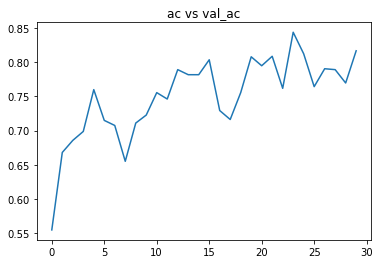

In [59]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title("ac vs val_ac")
plt.show()

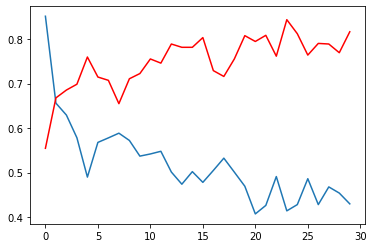

In [67]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'],c="red")
plt.show()

In [68]:
from keras.models import load_model
model=load_model("bestmodel.h5")

In [69]:
acc=model.evaluate_generator(test_data)

In [72]:
acc

[0.6670122742652893, 0.6790123581886292]

In [74]:
from keras.preprocessing.image import load_img,img_to_array

In [76]:
pwd

'E:\\externel code\\Cancer detection using deep learning'

In [86]:
path="./Data/Tumor/aug_Y4_0_6587.jpg"
img=load_img(path,target_size=(224,224))
input_arr=img_to_array(img)/255
input_arr=np.expand_dims(input_arr,axis=0)
pred=model.predict(input_arr)[0]
pred
if(pred>=0.5):
    print("Image contain Tumor")
else:
    print("Image not contain Tumor")

Image contain Tumor


In [83]:
train_data.class_indices

{'Normal': 0, 'Tumor': 1}

In [88]:
path="./Data/Normal/aug_12 no_0_1201.jpg"
img=load_img(path,target_size=(224,224))
input_arr=img_to_array(img)/255
input_arr=np.expand_dims(input_arr,axis=0)
pred=model.predict(input_arr)[0]
pred
if(pred>=0.5):
    print("Image contain Tumor")
else:
    print("Image not contain Tumor")

Image not contain Tumor
